In [10]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

In [11]:
def weekDay(dataframe) -> str:
    weeks = []
    memo={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
    for i in dataframe:
        day,month,year = [int(j) for j in i.split('-')]
        week = datetime.datetime(year,month,day).isoweekday()
        weeks.append(week)
    return weeks



In [12]:
df = pd.read_csv('data.csv').sample(frac=1)
df['week'] = pd.DataFrame(weekDay(df['Date']))
df['msg'] = df['msg'].str.replace('*','')
df.drop(columns=['Unnamed: 5', 'Unnamed: 6','Unnamed: 7'],inplace=True)
df = df[~(df['msg'].str.contains('http'))]

df

,Date,time,hour,who,msg,week
154,06-04-2024,2,37 pm,+91 98204 67690,Scheme II B,1
120,04-05-2024,9,14 am,+91 98200 82678,All the students of min project approach to r...,5
321,18-04-2024,11,08 am,+91 96657 07255,Dear students,5
438,25-04-2024,11,29 am,+91 98337 10723,Aditya Jadhav come to 706 immediately.,1
350,21-02-2024,10,39 am,+91 91369 12677,Interested students pls fill it,1
...,...,...,...,...,...,...
49,02-05-2024,10,04 am,+91 98678 06689,Aditya Jadhav please meet me.,2
107,04-04-2024,9,55 am,+91 98699 18310,A2 batch students have AOA practical today in...,4
471,28-03-2024,12,36 pm,+91 81697 56284,Dear studentsplz create login for virtual lab 👆,5
408,23-04-2024,5,16 pm,+91 98200 82678,🌟 Join the Innovation Revolution at the Innov...,6


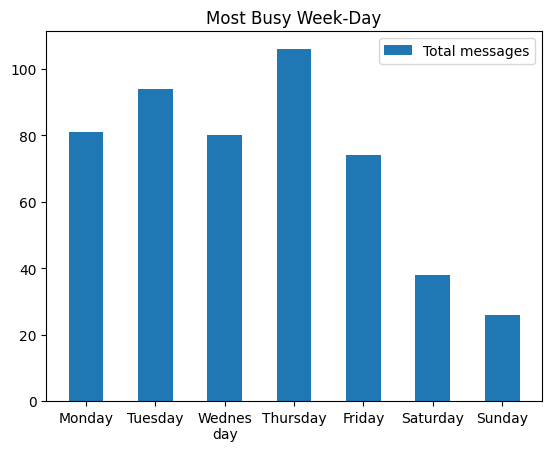

In [13]:
most_busy_day = df.groupby(by=['week'],as_index=False)['msg'].count().rename(columns={'msg':'Total Messages'}).sort_values('week').replace([i for i in range(1,8)],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

fig,ax=plt.subplots()

ax.bar(['Monday','Tuesday','Wednes\nday','Thursday','Friday','Saturday','Sunday'],most_busy_day['Total Messages'],width=0.5,label='Total messages')
ax.set_title('Most Busy Week-Day')
ax.legend()

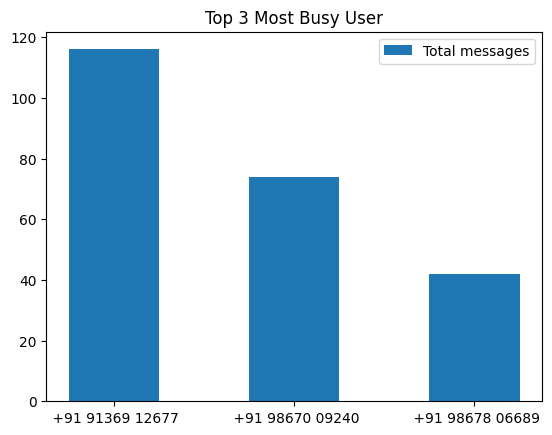

In [14]:
most_msg = df.groupby(by=['who'],as_index=False)['msg'].count().rename(columns={'msg':'Total Messages'}).sort_values('Total Messages',ascending=False).head(3)

fig,ax=plt.subplots()

ax.bar(most_msg['who'],most_msg['Total Messages'],width=0.5,label='Total messages')
ax.set_title('Top 3 Most Busy User')
ax.legend()


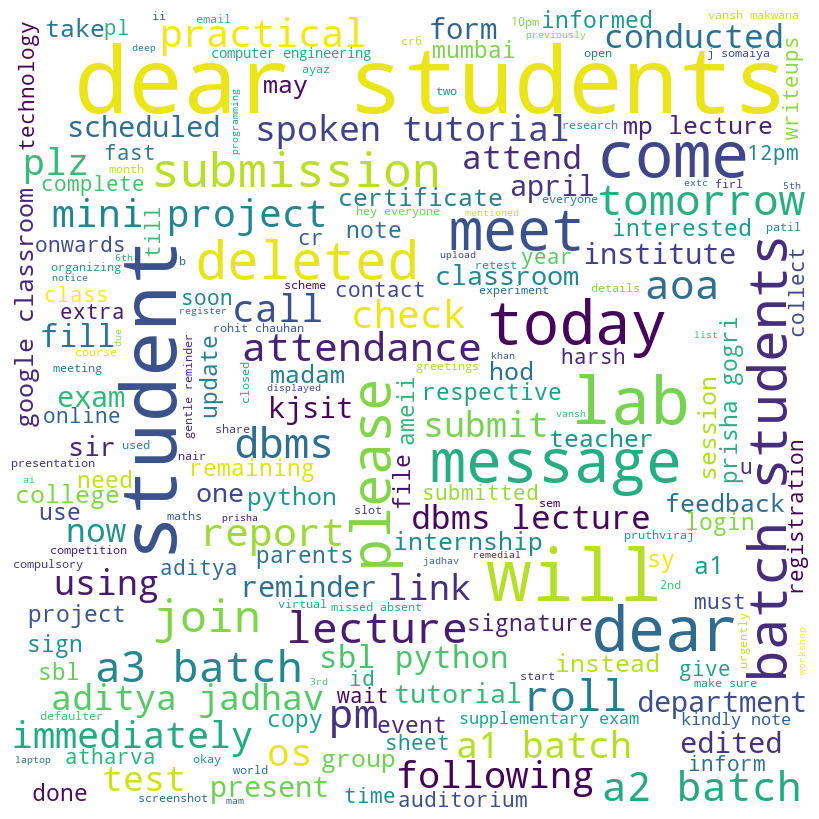

In [15]:
comment_words = ''
stopwords = set(STOPWORDS)
memo = defaultdict(int)

for val in df['msg']:
    
    tokens = str(val).split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        memo[tokens[i]] += 1
        
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

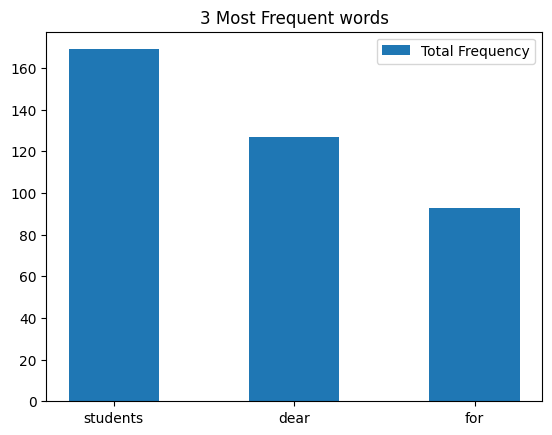

In [16]:
most_freq = {i:memo[i] for i in sorted(memo,key=lambda x:memo[x],reverse=True)[:3]}

fig,ax=plt.subplots()

ax.bar(most_freq.keys(),most_freq.values(),width=0.5,label='Total Frequency')
ax.set_title('3 Most Frequent words')
ax.legend()